# Tutorial 6

April 27

In [1]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from numpy.linalg import inv
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## General Linear Models

### Ex 1a

In [2]:
def f1(x):
    return(x+2*np.sin(x))

In [3]:
xs = [0, 3 ,10, 20]
y =[f1(x) for x in xs]
y

[0.0, 3.2822400161197343, 8.911957778221261, 21.825890501455255]

In [4]:
def least_square_estimator(X, y):
    step1 = np.transpose(X) * X
    leftpart = inv(step1)
    rightpart = np.transpose(X)* np.transpose(y)
    return(leftpart * rightpart)

In [5]:
X= np.matrix([[0,0],[3,np.sin(3)],[10, np.sin(10)],[20,np.sin(20)]])
y = np.matrix([[0,3.28,8.91,21.8]])
a, b = least_square_estimator(X, y)
print('estimate : ',a,b)

estimate :  [[0.99921329]] [[1.98915035]]


In [6]:
yhat = a*xs+b*np.sin(xs)
yhat

matrix([[ 0.        ,  3.27834878,  8.9099931 , 21.80025113]])

In [7]:
mse = ((np.array(yhat) - np.array(y))**2).mean()
print('MSE:', mse)

MSE: 6.974118553002666e-07


### Ex 1b

In [8]:
def f2(x):
    return(10-1*np.log(x))

In [9]:
xs = [1, 3, 10, 20]
y =[f2(x) for x in xs]
y

[10.0, 8.90138771133189, 7.697414907005954, 7.00426772644601]

In [10]:
X= np.matrix([[1,np.log(1)],[1,np.log(3)],[1, np.log(10)],[1,np.log(20)]])
y = np.matrix([[10, 8.9, 7.7, 7]])
a,b = least_square_estimator(X, y)
print('estimate : ',a,b)

estimate :  [[10.00028179]] [[-1.00065617]]


In [11]:
yhat = a+b*np.log(xs)
mse = ((np.array(yhat) - np.array(y))**2).mean()
print('MSE:', mse)

MSE: 5.550849923661116e-06


### Ex 1c

In [12]:
def f3(x):
    return(np.sin(2*np.pi*x) - 3 *np.cos(2*np.pi*x) )

In [13]:
xs = [0, 1]
y =[f3(x) for x in xs]

In [14]:
X= np.matrix([[np.sin(0), np.cos(0)],[np.sin(1),np.cos(1)]])
y = np.matrix([[-3.0,-3]])
a,b = least_square_estimator(X, y)
print('estimate : ',a,b)

estimate :  [[-1.63890747]] [[-3.]]


In [15]:
yhat = [a*np.sin(2*np.pi*i) +b *np.cos(2*np.pi*i) for i in xs]
mse = ((np.array(yhat) - np.array(y))**2).mean()
print('MSE:', mse)

MSE: 9.860761315262648e-32


### Exercice 2

Source 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

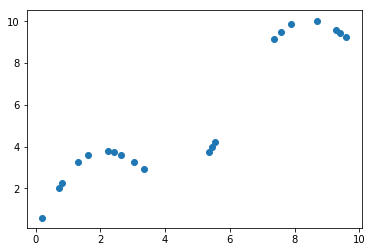

In [16]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x + 2*np.sin(x)

x_plot = np.linspace(0, 10, 100)
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)
plt.scatter(x, y);

In [17]:
# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

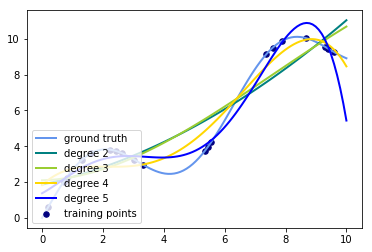

In [18]:
colors = ['teal', 'yellowgreen', 'gold','blue']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
plt.legend(loc='lower left')
plt.show()

### Example 2

## Non Linear Regression

### Exercice 3

In [19]:
def weibull(t, k):
    return(k *t**(k-1)* exp(-(t**k)))

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


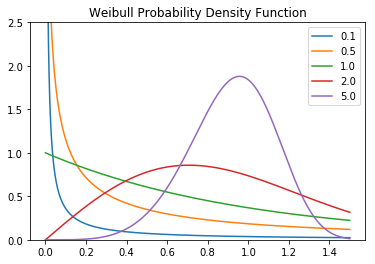

In [20]:
xs = np.linspace(0, 1.5, 10000)
klist=[0.1,0.5,1,2,5]
for k in klist :
    y =[weibull(x,k) for x in xs]
    plt.plot(xs, y, label=f'{k:.1f}');
    plt.ylim(0,2.5)
    plt.legend()
    plt.title('Weibull Probability Density Function')

In [21]:
k= 0.6
xs= [0.1, 0.6, 1.4, 4]
y =[weibull(x,k) for x in xs]
y

[1.1723611243600771,
 0.3525660504648689,
 0.1542593868666728,
 0.034640211896295334]

#### Estimate the parameter k

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [31]:
from scipy.optimize import curve_fit

In [32]:
def func(x,k):
    fx = k*x**(k-1)*np.exp(-(x**k))
    return(fx)

In [33]:
x = np.array([0.1,0.6,1.4,4])
ydata = np.array([1.17,0.35,0.15,0.03])

In [34]:
popt, pcov = curve_fit(func, x, ydata)

In [38]:
print('Estimate of k = ', popt)

Estimate of k =  [0.59341099]
